In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds=pd.read_csv("hamspam.tsv",delimiter='\t')

In [3]:
a=[]
for x in ds.ham:
    if x=="ham":
        a.append(0)
    else:
        a.append(1)

In [14]:
ds["class1"]=a

In [5]:
b=ds.ham.values

In [6]:
h1=0
s1=0
for i in b:
    if i=="ham":
        h1=h1+1
    else:
        s1=s1+1

In [7]:
h1

4821

In [8]:
s1

746

<BarContainer object of 2 artists>

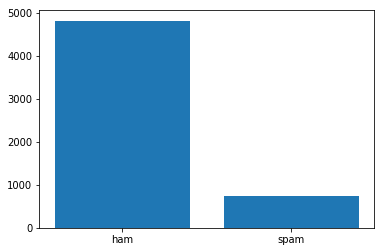

In [22]:
counts=ds.ham.value_counts()
plt.bar(counts.index,counts.get_values())

In [15]:
ds.head()

,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,class,class1
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
1,ham,"Nah I don't think he goes to usf, he lives aro...",0,0
2,ham,Even my brother is not like to speak with me. ...,0,0
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,0,0
4,ham,As per your request 'Melle Melle (Oru Minnamin...,0,0


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [56]:
x=ds["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."]

In [57]:
y=ds.ham

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [59]:
len(x_train)==len(y_train)

True

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer(stop_words="english")
count_train=count_vectorizer.fit_transform(x_train)

In [47]:
#count_vectorizer.fit(["hi i am mr","i am not a robot","you are robot"])
#count_vectorizer.get_feature_names()
#count_vectorizer.transform(["i am mr"]).toarray()
#count_train.toarray().shape

In [62]:
len(count_vectorizer.get_feature_names())

7436

In [67]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

accuracy:  0.985
Confusion matrix, without normalization
[[956   9]
 [  8 141]]


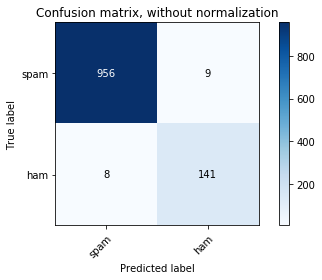

In [68]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools
clf=MultinomialNB(alpha=0.5)
clf.fit(count_train.toarray(),y_train)
count_test=count_vectorizer.transform(x_test)
pred=clf.predict(count_test)
score=metrics.accuracy_score(y_test,pred)
print("accuracy:  %0.3f"%score)
plot_confusion_matrix(y_test,pred,classes=['spam','ham'])

In [74]:
clf.predict(count_vectorizer.transform(["you won a free ticket"]))

array(['spam'], dtype='<U4')

In [77]:
count_train

<4453x7436 sparse matrix of type '<class 'numpy.int64'>'
	with 35022 stored elements in Compressed Sparse Row format>